In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime

In [142]:
drive.mount("/content/drive")
datosCrudos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/202201-divvy-tripdata.csv')
#Mostrando algunos elementos de la base
datosCrudos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103765,8788DA3EDE8FD8AB,electric_bike,2022-01-18 12:36:48,2022-01-18 12:46:19,Clinton St & Washington Blvd,WL-012,NaN,NaN,41.883436,-87.641391,41.890000,-87.620000,casual
103766,C6C3B64FDC827D8C,electric_bike,2022-01-27 11:00:06,2022-01-27 11:02:40,Racine Ave & Randolph St,13155,NaN,NaN,41.884158,-87.656977,41.880000,-87.650000,casual
103767,CA281AE7D8B06F5A,electric_bike,2022-01-10 16:14:51,2022-01-10 16:20:58,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949066,-87.648611,41.950780,-87.659172,casual
103768,44E348991862319B,electric_bike,2022-01-19 13:22:11,2022-01-19 13:24:27,Racine Ave & Randolph St,13155,NaN,NaN,41.884005,-87.657031,41.880000,-87.660000,casual


In [143]:
datosCrudos.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [144]:
#Visualizando si es que existen valores nulos
print(datosCrudos.isna().sum())
#Visualizando datos duplicados
print("Cantidad de elementos duplicados", datosCrudos.duplicated().sum())

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
dtype: int64
Cantidad de elementos duplicados 0


In [145]:
datosCrudosSinNulos = datosCrudos.dropna()

In [146]:
date_format = '%Y-%m-%d %H:%M:%S'
for index, row in datosCrudosSinNulos.iterrows():
  datosCrudosSinNulos['started_at'].loc[index] = datetime.strptime(datosCrudosSinNulos['started_at'][index],date_format)
  datosCrudosSinNulos['ended_at'].loc[index] = datetime.strptime(datosCrudosSinNulos['ended_at'][index],date_format)
datosCrudosSinNulos.dtypes

datosCrudosSinNulos['ride_lenght'] =datosCrudosSinNulos['ended_at'] - datosCrudosSinNulos['started_at']

<ipython-input-146-fb6c3c924d9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCrudosSinNulos['started_at'].loc[index] = datetime.strptime(datosCrudosSinNulos['started_at'][index],date_format)
<ipython-input-146-fb6c3c924d9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCrudosSinNulos['ended_at'].loc[index] = datetime.strptime(datosCrudosSinNulos['ended_at'][index],date_format)
<ipython-input-146-fb6c3c924d9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [166]:
datosCrudosSinNulos= datosCrudosSinNulos.assign(day = None)


In [167]:
for index, row in datosCrudosSinNulos.iterrows():
  a =datosCrudosSinNulos['started_at'][index]
  datosCrudosSinNulos['day'].loc[index] = a.weekday()

<ipython-input-167-ede937bf2e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCrudosSinNulos['day'].loc[index] = a.weekday()
<ipython-input-167-ede937bf2e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCrudosSinNulos['day'].loc[index] = a.weekday()
<ipython-input-167-ede937bf2e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCrudosSinNulos['day'].loc[index] = a.weekday()
<ipython-input-167-ede937bf2e3a>:3: S

In [183]:
print("Promedio de duraccion de los viajes ", datosCrudosSinNulos['ride_lenght'].mean())
print("duraccion maxima de los viajes registrados ", datosCrudosSinNulos['ride_lenght'].max())
print("moda de los dias de la semana", datosCrudosSinNulos['day'].mode())

####
print("Promedio de duraccion de los viajes de los miembros ", datosCrudosSinNulos.loc[datosCrudosSinNulos['member_casual'] == 'member', 'ride_lenght'].mean())
print("Promedio de duraccion de los viajes de los casuales", datosCrudosSinNulos.loc[datosCrudosSinNulos['member_casual'] == 'casual', 'ride_lenght'].mean())



Promedio de duraccion de los viajes  0 days 00:12:57.457717651
duraccion maxima de los viajes registrados  20 days 07:51:06
moda de los dias de la semana 0    3
Name: day, dtype: object
Promedio de duraccion de los viajes de los miembros  0 days 00:10:16.195414895
Promedio de duraccion de los viajes de los casuales 0 days 00:27:21.314478381


<Axes: >

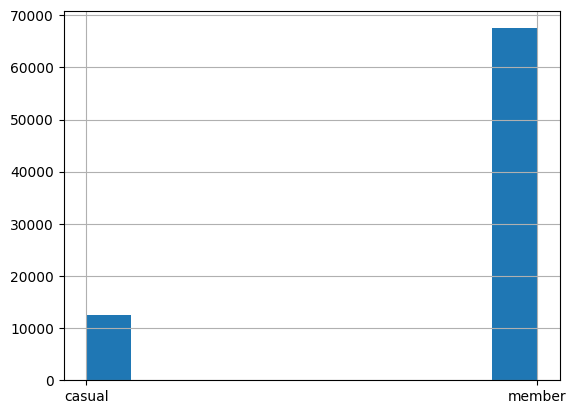

In [185]:
datosCrudosSinNulos['member_casual'].hist()

<Axes: xlabel='day', ylabel='count'>

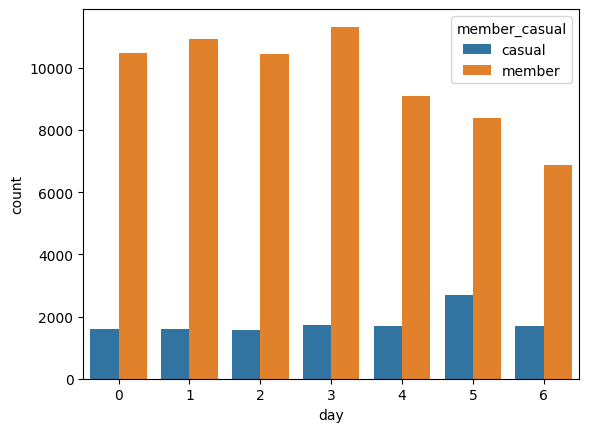

In [190]:
sns.countplot(data=datosCrudosSinNulos,x='day',hue='member_casual')

<Axes: xlabel='day', ylabel='ride_lenght'>

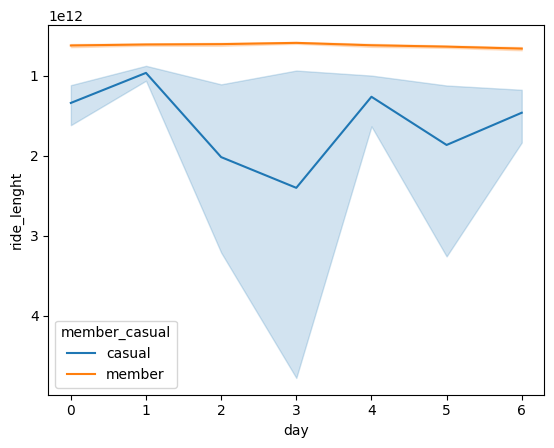

In [193]:
sns.lineplot(data=datosCrudosSinNulos, x="day", y="ride_lenght", hue="member_casual")

<Axes: xlabel='day', ylabel='count'>

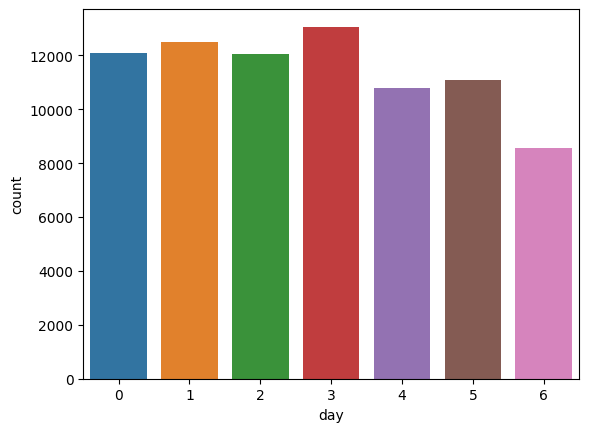

In [194]:
sns.countplot(data=datosCrudosSinNulos,x='day')